# A rank of the influence of nations through exports and imports

## By Jonah Heyl


###  Set up:

In [1]:
import os
try:
    import requests as rq
except:
    os.system("pip install requests")
    import requests as rq
try:
    import json
except:
    os.system("pip install json")
    import json
try:
    import numpy as np
except:
    os.system("pip install numpy")
    import numpy as np
try:
    import pandas as pd
except:
    os.system("pip install pandas")
    import pandas as pd


In [3]:
np.random.seed(1234)
wto_data = pd.read_csv('wto.csv')

In [4]:
wto_yearly_dic={}
for year in wto_data["year"]:
    wto_yearly_dic[year]=[]

In [5]:
for index in range(0,len(wto_data)-1):
    temp=wto_data.iloc[index]
    temp_dic={"exporter":temp["exporter"],"importer":temp["importer"],"trade":temp["trade"]}
    wto_yearly_dic[temp["year"]].append(temp_dic)

KeyboardInterrupt: 

In [5]:
jj=json.dumps(wto_yearly_dic)
with open("wto.json","w") as f:
    f.write(jj)

In [ ]:
wto_data[1:5]

,pair_id,year,exporter,importer,trade
1,230,1980,AFG,AUT,519427.470
2,235,1980,AFG,BGD,27231.648
3,241,1980,AFG,BLX,419159.750
4,251,1980,AFG,CAN,66580.422


In [ ]:
l=wto_data["exporter"]+wto_data["importer"]
u= lambda x:  [i for n, i in enumerate(x) if i not in x[:n]]

In [ ]:
list_all_contries=u(l)

In [ ]:
try:
    import networkx as nx
except:
    os.system("pip install networkx")
    import networkx as nx

This next cell makes a dirrected wieghted graph of all the placements

In [ ]:
def build_dic_graph(year,export_good=True,all_contries=list_all_contries,dic=wto_yearly_dic):
    DG = nx.DiGraph()
    DG.add_nodes_from(all_contries)
    if export_good:
        for deal in wto_yearly_dic[year]:
            DG.add_weighted_edges_from([(deal["importer"], deal['exporter'],deal['trade'])]) 
        return DG
    for deal in wto_yearly_dic[year]:
            DG.add_weighted_edges_from([( deal['exporter'],deal["importer"],deal['trade'])]) 
    return DG

### Createing the dirrected graph:

Here we start makeing a dirrected graph, each node is a unvirsitity which has many edges, each of which are dirrected.  The edges connect the unvirsities from a given set of placements.But the dirrection is flipped, so if the dirrected edge points into Harvard, it means the from_insutions in the given placement is Harvard.The converse is true for the edges that point away from the unvirisities. Now each edge is wieghted, by the number of placements of that type that occur in the data. So, if Harvard had 3 people end up working at stripe, then there would be two edges, one pointing into hHrved from stripe, and another pointing away from stripe ,both would be wieghted three.This is what is meant by an "inverse google search rank", we are flipping the dirrection of the arrows. This because good unviristities are typical thought of as ones that get their grads jobs at highly slective places, not unviristies that hire lots of people.

# Google Page Rank Algorithim

Here we use the google page rank algorithim to rank all of the unvirsities. Now what is the google page rank, algorithim, well it ranks insutations based on the probabibility of being at a given insution for a being who is pepertally getting hired and graduteing from unviristies.This is also approximatly, many people graduteing and getting hired at different places over a finite peirod of time.This describes the eigon-vector  of the adjency matrix of our graph (in patricalr the egion vector with the highest egion value).

In [ ]:
from networkx import pagerank 

In [ ]:
def pagerank_numpy(G, alpha=0.1, personalization=None, weight='weight', dangling=None): 

    if len(G) == 0:
        return {}

    M = nx.google_matrix(G, alpha, personalization=personalization,
                      weight=weight, dangling=dangling)
    print(M)
    eigenvalues, eigenvectors = np.linalg.eig(M.T)
    ind = eigenvalues.argsort()
    largest = np.array(eigenvectors[:, ind[-1]]).flatten().real
    norm = float(largest.sum())

    return dict(zip(G, map(float, largest / norm))) 

In [6]:
DG=build_dic_graph(2016,True,list_all_contries,wto_yearly_dic)
pr=nx.pagerank(DG) #https://networkx.guide/algorithms/link-analysis/pagerank/

NameError: name 'build_dic_graph' is not defined

In [81]:
marklist = sorted(pr.items(), key=lambda x:-x[1])
s = dict(marklist)
newdict={}
for key in s:
    if type(key) is str:
        newdict[key]=s[key]
    else:
        newdict[key[0]]=s[key]

        


In [82]:
marklist

[('CHN', 0.0005288611882426785),
 ('USA', 0.0003141794460030274),
 ('DEU', 0.00018081723782806714),
 ('FRA', 0.00017018724802617786),
 ('IND', 0.0001554625007091713),
 ('JPN', 0.0001453037105166193),
 ('KOR', 0.00014276893862225117),
 ('ZAF', 0.0001333886068632561),
 ('ITA', 0.00012875771769503213),
 ('GBR', 0.0001129894845674646),
 ('ESP', 0.00010868402514449157),
 ('AUS', 0.00010650397492277152),
 ('NLD', 9.577015378493861e-05),
 ('TUR', 9.247924535319931e-05),
 ('BRA', 8.530316051540389e-05),
 ('RUS', 8.528034859849502e-05),
 ('NZL', 8.182113710050517e-05),
 ('BLX', 8.120232183097643e-05),
 ('THA', 7.797999430513137e-05),
 ('SGP', 7.763955560919944e-05),
 ('IDN', 6.683481571066476e-05),
 ('MYS', 6.666641013760117e-05),
 ('POL', 6.26750193300481e-05),
 ('PRT', 5.980746718196504e-05),
 ('DNK', 5.798923799551851e-05),
 ('CHE', 5.3643095775711866e-05),
 ('SWE', 5.046249714766109e-05),
 ('CAN', 4.908264746287412e-05),
 ('MEX', 4.897690929434707e-05),
 ('ISR', 4.630024867825001e-05),
 ('S

In [83]:
for ii,key in enumerate(s):
    if ii>100:
        break
    print(ii+1,key,s[key])

1 CHN 0.0005288611882426785
2 USA 0.0003141794460030274
3 DEU 0.00018081723782806714
4 FRA 0.00017018724802617786
5 IND 0.0001554625007091713
6 JPN 0.0001453037105166193
7 KOR 0.00014276893862225117
8 ZAF 0.0001333886068632561
9 ITA 0.00012875771769503213
10 GBR 0.0001129894845674646
11 ESP 0.00010868402514449157
12 AUS 0.00010650397492277152
13 NLD 9.577015378493861e-05
14 TUR 9.247924535319931e-05
15 BRA 8.530316051540389e-05
16 RUS 8.528034859849502e-05
17 NZL 8.182113710050517e-05
18 BLX 8.120232183097643e-05
19 THA 7.797999430513137e-05
20 SGP 7.763955560919944e-05
21 IDN 6.683481571066476e-05
22 MYS 6.666641013760117e-05
23 POL 6.26750193300481e-05
24 PRT 5.980746718196504e-05
25 DNK 5.798923799551851e-05
26 CHE 5.3643095775711866e-05
27 SWE 5.046249714766109e-05
28 CAN 4.908264746287412e-05
29 MEX 4.897690929434707e-05
30 ISR 4.630024867825001e-05
31 SAU 4.5194530871467664e-05
32 GRC 4.470220728240387e-05
33 CZE 4.297688849404938e-05
34 EGY 4.259413995522995e-05
35 BLR 4.2438066

In [84]:
for ii,key in enumerate(newdict):
    if ii>5:
        break
    print(key,newdict[key])

CHN 0.0005288611882426785
USA 0.0003141794460030274
DEU 0.00018081723782806714
FRA 0.00017018724802617786
IND 0.0001554625007091713
JPN 0.0001453037105166193


In [76]:
#li=list(s) #this saves the ranking
jj= json.dumps(newdict)
with open("google_rank4.json","w") as f:
    f.write(jj)


# China's influence overtime 

In [94]:
china=[]
usa=[]
uk=[]
for i in range(2000,2016):
    DG=build_dic_graph(i,True,list_all_contries,wto_yearly_dic)
    pr=nx.pagerank(DG) 
    china.append(pr["CHN"])
    usa.append(pr["USA"])
    uk.append(pr["GBR"])

In [89]:
import matplotlib.pyplot as plt

In [95]:
china

[0.00014990505645784652,
 0.00016007541577662968,
 0.0001716538073844541,
 0.00019583245617205285,
 0.00022935823222135546,
 0.00025103668466554274,
 0.00028799659327371526,
 0.0003245416518650315,
 0.00033920927587850183,
 0.000354770056539725,
 0.00037670097215153293,
 0.00038946264919301687,
 0.0004493489530750087,
 0.00043620081418633075,
 0.0004678821581020333,
 0.0005369737791903179]

In [107]:
import datetime

In [127]:
#dates=np.array([datetime.datetime(2000, 1, i+1) for i in range(16)])
dates=range(2000,2016)

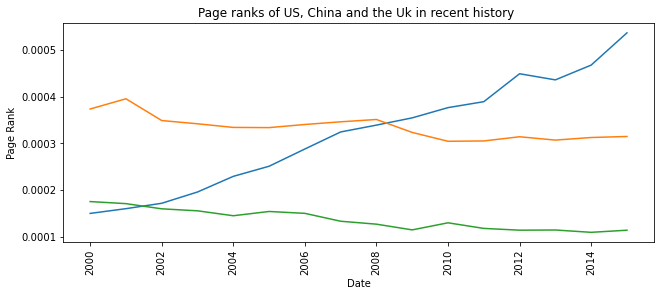

In [150]:
fig, ax = plt.subplots()
ax.plot(dates,china)
ax.ticklabel_format(style='plain')
plt.xlabel("Date")
plt.ylabel("Page Rank")
plt.title("Page ranks of US, China  and the Uk in recent history ")
plt.plot(dates,usa)
plt.plot(dates,uk)
plt.tight_layout()
plt.tick_params(axis='x', rotation=90)
fig.set_figwidth(20)
fig.set_figwidth(10)
plt.show()